In [1]:
from matplotlib.pylab import plt

In [2]:
import pandas as pd
import lux

In [3]:
df = pd.read_csv("basic_scatter.csv")
df2 = pd.read_csv("heatmap.csv")
df3 = pd.read_csv("sampled_scatter.csv")
df4 = pd.read_csv("manual_heatmap.csv")
df5 = pd.read_csv("manual_heatmap_2x_coarse.csv")

In [40]:
def plot_loglog(df,label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    plt.loglog(df["nPts"], df["pandas cost"],'-',label=label,color=color)
    plt.loglog(df["nPts"], df["altair cost"],'--',color=color)
    
def plot_loglog_total(df,label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    df["total"] = df["pandas cost"]+df["altair cost"]
    plt.loglog(df["nPts"], df["total"],'-o',label=label,color=color)

def plot_logx(df,label="",color="red"):
    plt.xlabel('number of datapoints')
    plt.ylabel('time (s)')
#     plt.plot(df["nPts"], df["pandas cost"],'-o',label=label,color=color)
#     plt.plot(df["nPts"], df["altair cost"],'--',color=color)
    df["total"] = df["pandas cost"]+df["altair cost"]
    plt.plot(df["nPts"], df["total"],'-o',label=label,color=color)
    plt.xscale('log')


In [41]:
import numpy as np
print (np.mean(df2["altair cost"]/df["altair cost"]))
print (np.mean(df2["altair cost"]-df["altair cost"]))

1.0331747676608791
0.0038180588235294144


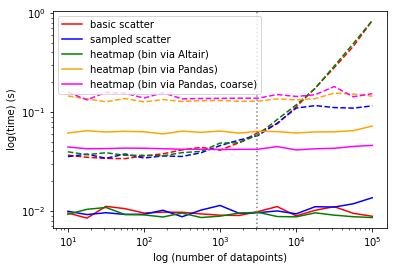

In [42]:
plot_loglog(df,"basic scatter","red")
plot_loglog(df3,"sampled scatter","blue")
plot_loglog(df2,"heatmap (bin via Altair)","green")
plot_loglog(df4,"heatmap (bin via Pandas)","orange")
plot_loglog(df5,"heatmap (bin via Pandas, coarse)","magenta")
plt.axvline(x= 3100,linestyle=':',color="grey")
plt.legend()


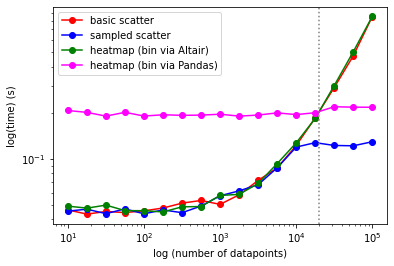

In [18]:
plot_loglog_total(df,"basic scatter","red")
plot_loglog_total(df3,"sampled scatter","blue")
plot_loglog_total(df2,"heatmap (bin via Altair)","green")
plot_loglog_total(df4,"heatmap (bin via Pandas)","magenta")
plt.axvline(x= 20000,linestyle=':',color="grey")
plt.legend()


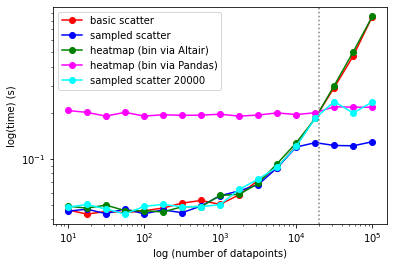

In [43]:
df6 = pd.read_csv("sampled_scatter_20000.csv")
plot_loglog_total(df,"basic scatter","red")
plot_loglog_total(df3,"sampled scatter","blue")
plot_loglog_total(df2,"heatmap (bin via Altair)","green")
plot_loglog_total(df4,"heatmap (bin via Pandas)","magenta")
plot_loglog_total(df6,"sampled scatter 20000","cyan")
plt.axvline(x= 20000,linestyle=':',color="grey")
plt.legend()


In [19]:
# plot_logx(df,"basic scatter","red")
# plot_logx(df3,"sampled scatter","blue")
# plot_logx(df2,"heatmap (bin via Altair)","green")
# plot_logx(df4,"heatmap (bin via Pandas)","orange")

Preliminary insights: 

- Cost of drawing a heatmap in Altair cost about 1.03x (3.8ms) more than how much it takes to draw a scatterplot. This makes sense, because with a grid size of 50x50 (around 2500), it would actually be cheaper to draw the scatterplot with fewer number of points, than the full grid of values (minus zeroes). 
- Up to about 3000 datapoints, it is cheaper to draw scatterplots than it is to draw heatmaps.
- Even though we can sample down to lower the cost of drawing scatterplot. The problem of occlusion kicks in also, which can actually mean that the binned heatmap can actually be a better representation of the data than scatterplots.
- The cost of all Altair plotting scales linearly as a function of the number of input data tuples (both heatmap and scatterplot cost the same to render). This explains why the cost of drawing heatmap is relatively constant due to the fixed grid size. The scatterplots scale with the number of samples (Blue v.s. cyan). 
- The cost of plotting about 20000 samples scatter is about the same as 50x50 grid.

--> The scatterplot plotting strategy we should use is to plot scatterplots for data size < 5000 and binned heatmap > 5000. (we can suppress the color bar for scatterplots)

--> For colored scatterplot, we can use opacity to signal data size instead of color.

### Analysis of Lux display performance (heatmap v.s. scatterplot)

In [84]:
df = pd.read_csv("execute_lux_heatmap.csv")
df2 = pd.read_csv("execute_lux_scatter.csv")
df3 = pd.read_csv("execute_lux_sampled_heatmap.csv")
df4 = pd.read_csv("execute_lux_sampled_scatter.csv")

In [87]:
def plot_loglog(df,label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    plt.plot(48895*df["nCopies"], df["time"],'-o',label=label,color=color)
    plt.yscale('log')

Text(0.5, 1.0, 'Altair Rendering Cost')

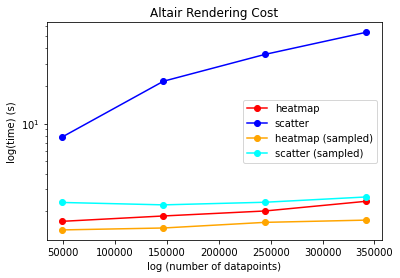

In [88]:
plot_loglog(df,"heatmap")
plot_loglog(df2,"scatter",color="blue")
plot_loglog(df3,"heatmap (sampled)",color="orange")
plot_loglog(df4,"scatter (sampled)",color="cyan")
plt.legend()
plt.title("Altair Rendering Cost")

In [75]:
def plot_linear(df,label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    plt.plot(48895*df["nCopies"], df["time"],'-o',label=label,color=color)

Text(0.5, 1.0, 'Altair Rendering Cost')

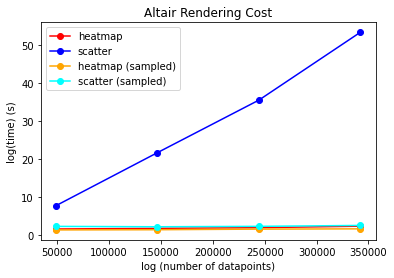

In [82]:
plot_linear(df,"heatmap")
# plot_linear(df2,"scatter",color="blue")
plot_linear(df3,"heatmap (sampled)",color="orange")
plot_linear(df4,"scatter (sampled)",color="cyan")
plt.legend()
plt.title("Altair Rendering Cost")

### New set of experiments

In [113]:
df = pd.read_csv("airbnb_heatmap_unsampled.csv")
df2 = pd.read_csv("airbnb_scatter_unsampled.csv")
df3 = pd.read_csv("airbnb_heatmap_sampled.csv")
df4 = pd.read_csv("airbnb_scatter_sampled.csv")

In [117]:
def plot_loglog(df,label="",color="red"):
    plt.xlabel('log (number of datapoints)')
    plt.ylabel('log(time) (s)')
    plt.loglog(df["nCopies"], df["time"],'-o',label=label,color=color)

Text(0.5, 1.0, 'Total Lux Display Cost (Airbnb)')

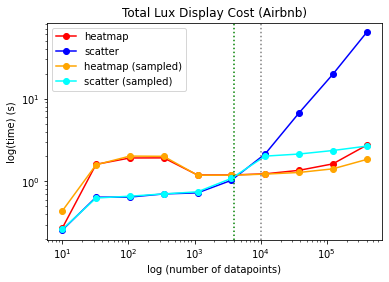

In [124]:
plot_loglog(df,"heatmap")
plot_loglog(df2,"scatter",color="blue")
plot_loglog(df3,"heatmap (sampled)",color="orange")
plot_loglog(df4,"scatter (sampled)",color="cyan")
plt.legend()
plt.axvline(x= 10000,linestyle=':',color="grey")
plt.axvline(x= 4e3,linestyle=':',color="green")
plt.title("Total Lux Display Cost (Airbnb)")

In [151]:
df = pd.read_csv("realestate_heatmap_unsampled.csv")
df2 = pd.read_csv("realestate_scatter_unsampled.csv")
df3 = pd.read_csv("realestate_heatmap_sampled.csv")
df4 = pd.read_csv("realestate_scatter_sampled.csv")

Text(0.5, 1.0, 'Total Lux Display Cost (Real Estate)')

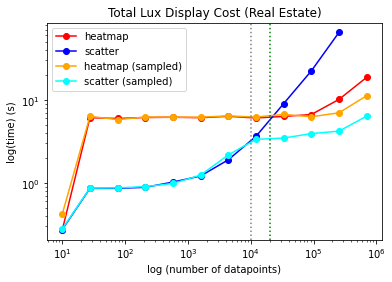

In [155]:
plot_loglog(df,"heatmap")
plot_loglog(df2,"scatter",color="blue")
plot_loglog(df3,"heatmap (sampled)",color="orange")
plot_loglog(df4,"scatter (sampled)",color="cyan")
plt.legend()
plt.axvline(x= 1e4,linestyle=':',color="grey")
plt.axvline(x= 2e4,linestyle=':',color="green")
plt.title("Total Lux Display Cost (Real Estate)")

Somewhere between 5000~20000 is the right point to switch from a sampled scatterplot to a heatmap